In [1]:
## attempt to analyse drivers of party switching behaviour 2015->2017

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import gc
import re

from itertools import cycle
from IPython.display import display
import pickle, os

import seaborn as sns

encoding = "ISO-8859-1"

import Jupyter_module_loader

In [2]:
# you should clone this git to this subdirectory (in some directory - I call it BES_analysis - doesn't matter though)

if os.getcwd().split(os.sep)[-1] != 'BES_analysis_code':
    raise Exception("Stop! You're in the wrong directory - should be in 'BES_analysis_code'")

BES_code_folder   = "../BES_analysis_code/" # we should be here!
BES_small_data_files = BES_code_folder + "small data files" + os.sep
if not os.path.exists( BES_small_data_files ):
    os.makedirs( BES_small_data_files )

# we should create these if they don't already exist
BES_data_folder   = "../BES_analysis_data/"
if not os.path.exists( BES_data_folder ):
    os.makedirs( BES_data_folder )

BES_output_folder = "../BES_analysis_output/"
if not os.path.exists( BES_output_folder ):
    os.makedirs( BES_output_folder )
    
BES_file_manifest = pd.read_csv( BES_small_data_files + "BES_file_manifest.csv" )

BES_R_data_files = BES_data_folder + "R_data" + os.sep
if not os.path.exists( BES_R_data_files ):
    os.makedirs( BES_R_data_files )


In [3]:
dataset_name = "W13_comb"

In [4]:
%%time

manifest = BES_file_manifest[ BES_file_manifest["Name"] == dataset_name ]

data_subfolder = BES_data_folder + dataset_name + os.sep

dataset_filename = manifest["Stata_Filename"].values[0]
# dataset_description = manifest["Friendlier_Description"].values[0]
# dataset_citation = manifest["Citation"].values[0]
# dataset_start = manifest["Date_Start"].values[0]
# dataset_stop = manifest["Date_Stop"].values[0]
# dataset_wave = manifest["Wave No"].values[0]

BES_Panel = pd.read_stata( data_subfolder + dataset_filename )
print("BES_Panel", BES_Panel.shape )

####

BES_numeric = pd.read_hdf( data_subfolder + "BESnumeric.hdf", "BESnumeric" )
print("BES_numeric",  BES_numeric.shape )

var_type    = pd.read_csv( data_subfolder + "var_type.csv", encoding=encoding)
var_type.set_index("Unnamed: 0", inplace=True)
print("var_type",  var_type.shape )

fname = data_subfolder + "cat_dictionary.pkl"
with open(fname, "rb") as f:
    cat_dictionary = pickle.load( f )
    
####

BES_non_numeric = pd.read_hdf( data_subfolder + "BESnon_numeric.hdf", "BESnon_numeric" )
print("BES_non_numeric",  BES_non_numeric.shape )

BES_reduced = pd.read_hdf( data_subfolder + "BES_reduced.hdf", "BES_reduced" )
print("BES_reduced",  BES_reduced.shape )

BES_reduced_with_na = pd.read_hdf( data_subfolder + "BES_reduced_with_na.hdf", "BES_reduced_with_na")
print("BES_reduced_with_na", BES_reduced_with_na.shape )

fname = data_subfolder + "new_old_col_names.pkl"
with open(fname, "rb") as f:
    new_old_col_names = pickle.load(f) 

KeyboardInterrupt: 

In [5]:
# [x for x in BES_Panel.columns if "hous" in x]

In [6]:
Weasel_answers = ["Don't know",
                  "Prefer not to say", "Prefer not to answer", "Refused", "Unknown",
                  "Neither", "Other", "I would/will not vote", "Will not vote",
                  "I would not vote", "It depends", "Other",
                  "Don't follow politics on twitter",
                  "Yes, other", "Haven't thought about it",
                  "There wasn't a local election in my area", "No, haven't received it",
                  "I don't know what was negotiated", "I never received a response",
                  "There are not local elections in my area", "Can't remember",
                  "Varies too much to say", "Will not state a choice",
                  "All leaders equally good", "They are not eligible to vote",
                  "There are not local elections in my area", "Both/neither",
                  "Did not vote","Can't remember",
                  "Not sure"]

In [ ]:
## what does a distribution of party-change/non-voting look like on an al_scale/lr_scale map?

In [10]:
lr_scale = BES_numeric[[x for x in BES_Panel.columns if "lr_scale" in x]].mean(axis=1)
al_scale = BES_numeric[[x for x in BES_Panel.columns if "al_scale" in x]].mean(axis=1)

4676

In [ ]:
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

In [14]:
valid_values = al_scale.notnull() & lr_scale.notnull()

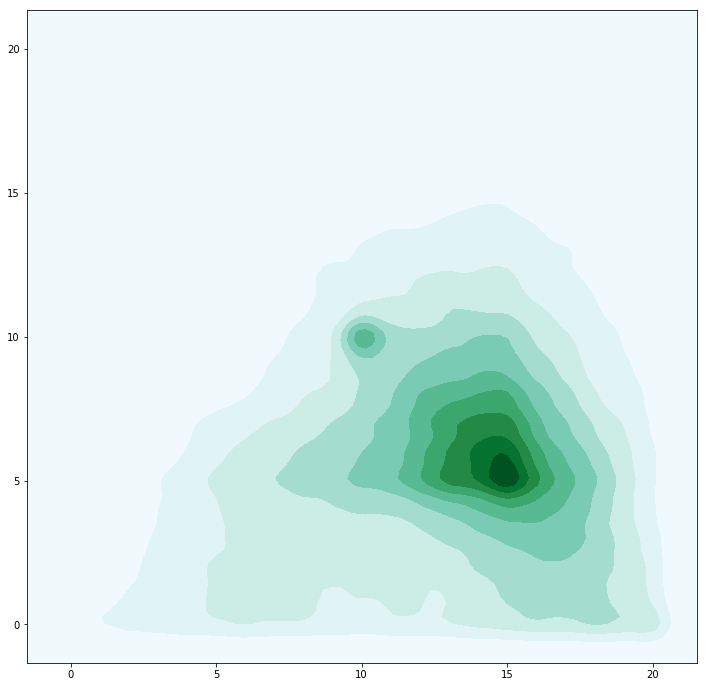

In [28]:
plt.figure(figsize=(12,12))
sns.kdeplot(al_scale[valid_values].values, lr_scale[valid_values].values, shade=True)

In [31]:
from scipy import stats
values = np.vstack([al_scale[valid_values].values , lr_scale[valid_values].values])
kernel = stats.gaussian_kde(values)

In [33]:
density = stats.gaussian_kde(values)(values)

In [ ]:
## Argument - ec. left/right means different things for social conservatives/liberals

## lets 

In [6]:
[x for x in BES_numeric.columns if "gayEquality" in x]

['gayEqualityW10',
 'gayEqualityW11',
 'gayEqualityW12',
 'gayEqualityW1W2W3W4W5',
 'gayEqualityW6W7W8W9']

In [7]:
lr_scale = BES_numeric[[x for x in BES_Panel.columns if "lr_scale" in x]].mean(axis=1)
al_scale = BES_numeric[[x for x in BES_Panel.columns if "al_scale" in x]].mean(axis=1)

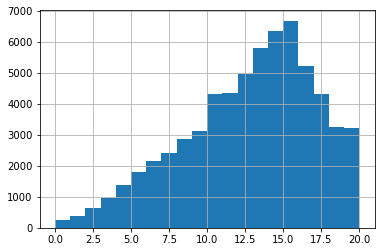

In [8]:
al_scale.hist(bins=20)


In [413]:
drop_list = [x for x in BES_numeric.columns if re.match("lr",x) or\
             re.search("Contact",x) or \
             re.search("Lab|Con|LD|SNP|UKIP|Grn|Greens|PC",x) or \
             re.match("lab[A-Z]|con[A-Z]|ld[A-Z]|snp[A-Z]|ukip[A-Z]|grn[A-Z]|pc[A-Z]",x)]
fraction = .25
soc_conservative = al_scale>=al_scale.quantile(1-fraction)
soc_liberal = al_scale<=al_scale.quantile(fraction  )
soc_con_N = BES_numeric[soc_conservative].notnull().sum()
soc_lib_N = BES_numeric[soc_liberal].notnull().sum()

drop_list = drop_list + list(soc_con_N[soc_con_N<300].index) + list(soc_lib_N[soc_lib_N<300].index) 
drop_list = list(set(drop_list))
drop_list.append("blackEqualityW13") ## wonky!

In [414]:
soclib_lrcorr = BES_numeric[soc_liberal].drop(drop_list,axis=1).corrwith(lr_scale[soc_liberal])
soccon_lrcorr = BES_numeric[soc_conservative].drop(drop_list,axis=1).corrwith(lr_scale[soc_conservative])

In [415]:
soclib_mean = BES_numeric[soc_liberal].drop(drop_list,axis=1).mean()
soccon_mean = BES_numeric[soc_conservative].drop(drop_list,axis=1).mean()

In [416]:
soclib_lrcorr.dropna().sort_values().head(10)

bestPMW8               -0.697978
bestPMW7               -0.695767
cutsTooFarNationalW6   -0.667279
privatTooFarW6         -0.666018
bestPMW12              -0.652989
cutsTooFarNationalW7   -0.651893
renationaliseRailW11   -0.643546
cutsTooFarNationalW1   -0.640957
cutsTooFarNationalW4   -0.634270
cutsTooFarNationalW3   -0.633876
dtype: float64

In [417]:
soccon_lrcorr.dropna().sort_values().head(10)

polForTheRichW1        -0.665847
polForTheRichW7        -0.621906
polForTheRichW4        -0.620967
polForTheRichW3        -0.614920
polForTheRichW2        -0.565438
cutsTooFarNationalW6   -0.561530
cutsTooFarNationalW1   -0.532708
cutsTooFarNHSW6        -0.520265
cutsTooFarLocalW6      -0.520145
cutsTooFarNationalW4   -0.513886
dtype: float64

In [418]:
# soclib_lrcorr.dropna().drop(drop_list, errors= 'ignore').sort_values()

In [419]:
# soccon_lrcorr.dropna().drop(drop_list, errors= 'ignore').sort_values()

In [420]:
con_minus_lib = soccon_lrcorr - soclib_lrcorr
biggest_differences = con_minus_lib.abs().sort_values(ascending=False)>con_minus_lib.abs().quantile(0.95)
biggest_differences = biggest_differences[biggest_differences].index


In [421]:
biggest_differences

Index(['effectsEUWorkersW8', 'effectsEUWorkersW7', 'selfRedistCertainW6',
       'al_scaleW13', 'effectsEUWorkersW11', 'al_scaleW6', 'al_scaleW10W11W12',
       'effectsEUWorkersW10', 'effectsEUWorkersW13', 'efficacyNoMatterW11',
       ...
       'likeNuttallW12', 'antiIntellectualW9', 'ukCoopWorkersW8', 'echrW7',
       'keepNukesW4', 'partyMemberW8', 'partyMemberW11', 'partyIdStrengthW6',
       'euParlOverRideW8', 'happyEULeaveW13'],
      dtype='object', length=131)

In [422]:
side_by_side = pd.concat([soclib_lrcorr,soccon_lrcorr],axis=1)
side_by_side.columns = ["social liberals lr_corr","social conservatives lr_corr"]
side_by_side.loc[biggest_differences]
side_by_side["social liberal mean"] = soclib_mean
side_by_side["social conservative mean"] = soccon_mean

In [423]:
side_by_side.loc[biggest_differences].var()

social liberals lr_corr          0.085505
social conservatives lr_corr     0.018686
social liberal mean              5.275346
social conservative mean        11.383840
dtype: float64

In [424]:
BES_output_folder = "../BES_analysis_output/"
BES_output_subfolder = BES_output_folder + os.sep + "difference_between_social_conservatives_and_liberals" + os.sep
if not os.path.exists( BES_output_subfolder ):
    os.makedirs( BES_output_subfolder )

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.


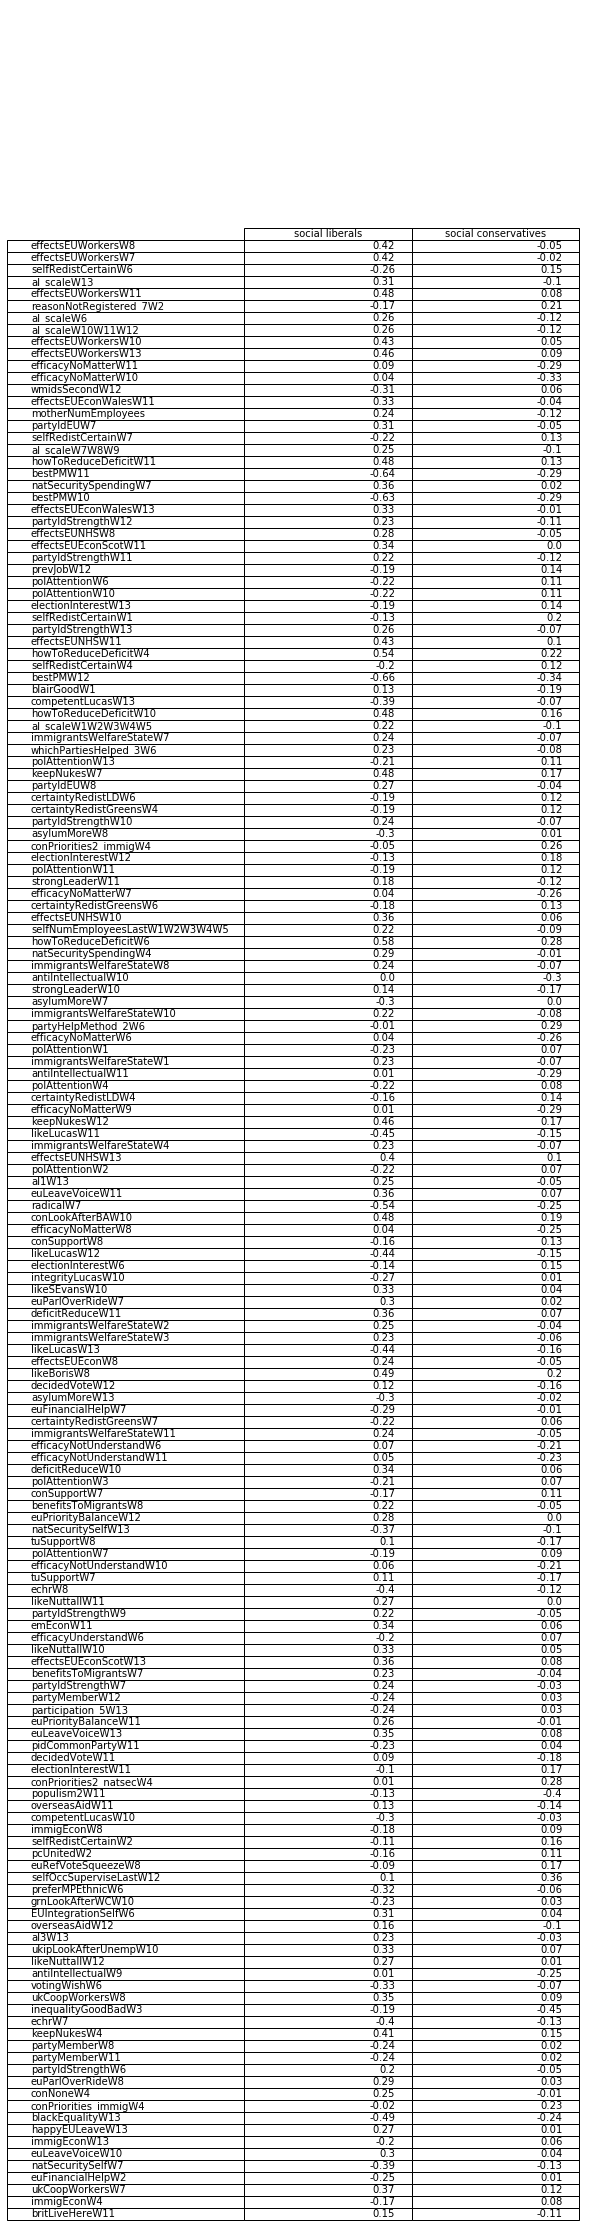

In [162]:
from pandas.tools.plotting import table
ax = plt.subplot(111, frame_on=False) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

table(ax, side_by_side.loc[biggest_differences].apply(lambda x: np.floor(x*100)/100)) 
plt.savefig(BES_output_subfolder + 'table_of_biggest_differences.pdf')



In [425]:
indices = side_by_side.loc[biggest_differences].index

In [426]:
short_names = [re.match('(.+?)_?(W[0-9]+)+',x).groups()[0] if re.match('(.+)_?(W[0-9]+)+',x) else x for x in side_by_side.index]
side_by_side["short_names"] = short_names
side_by_side["lr_corr difference"] = con_minus_lib
side_by_side["long_names"] = side_by_side.index

In [427]:
side_by_side.loc[biggest_differences].set_index("short_names").sort_index()

,social liberals lr_corr,social conservatives lr_corr,social liberal mean,social conservative mean,lr_corr difference,long_names
short_names,,,,,,
EUIntegrationSelf,0.312735,0.048379,3.756913,8.157424,-0.264356,EUIntegrationSelfW6
al1,0.250550,-0.042570,1.429935,3.610910,-0.293120,al1W13
al3,0.239722,-0.024324,1.758296,3.592607,-0.264046,al3W13
al_scale,0.224935,-0.093402,7.362775,17.698035,-0.318337,al_scaleW1W2W3W4W5
al_scale,0.255618,-0.096000,6.877236,17.386004,-0.351618,al_scaleW7W8W9
al_scale,0.311073,-0.091021,6.606942,17.491987,-0.402094,al_scaleW13
al_scale,0.269166,-0.111334,6.781611,17.446333,-0.380499,al_scaleW6
al_scale,0.266864,-0.113084,6.857038,17.517193,-0.379949,al_scaleW10W11W12
antiIntellectual,0.016944,-0.283144,1.241938,2.495372,-0.300088,antiIntellectualW11


In [428]:
sbs_with_dup = side_by_side.loc[biggest_differences].set_index("short_names").sort_index()
sbs_with_dup[~sbs_with_dup.index.duplicated(keep='first')]

,social liberals lr_corr,social conservatives lr_corr,social liberal mean,social conservative mean,lr_corr difference,long_names
short_names,,,,,,
EUIntegrationSelf,0.312735,0.048379,3.756913,8.157424,-0.264356,EUIntegrationSelfW6
al1,0.250550,-0.042570,1.429935,3.610910,-0.293120,al1W13
al3,0.239722,-0.024324,1.758296,3.592607,-0.264046,al3W13
al_scale,0.224935,-0.093402,7.362775,17.698035,-0.318337,al_scaleW1W2W3W4W5
antiIntellectual,0.016944,-0.283144,1.241938,2.495372,-0.300088,antiIntellectualW11
asylumMore,-0.297010,-0.013629,6.171566,1.518867,0.283382,asylumMoreW13
benefitsToMigrants,0.238657,-0.033711,1.643993,2.766282,-0.272368,benefitsToMigrantsW7
bestPM,-0.652989,-0.332294,0.678566,0.138234,0.320695,bestPMW12
blairGood,0.135360,-0.184416,0.385597,0.246900,-0.319776,blairGoodW1


In [475]:
biggest_differences_for_clust = con_minus_lib.abs().sort_values(ascending=False)>con_minus_lib.abs().quantile(0.95)
biggest_differences_for_clust = biggest_differences_for_clust[biggest_differences_for_clust].index

X = side_by_side.loc[biggest_differences_for_clust][["social liberals lr_corr","social conservatives lr_corr"]]
# 

In [476]:
## so, now I want to cluster this based on patterns of correlation
from sklearn.cluster import MeanShift, estimate_bandwidth

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)


number of estimated clusters : 4


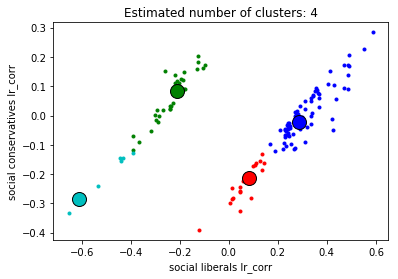

In [500]:
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X.values[my_members, 0], X.values[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.xlabel("social liberals lr_corr")
plt.ylabel("social conservatives lr_corr")
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [485]:
side_by_side.loc[biggest_differences_for_clust]["cluster"] = labels

In [498]:
# blue: social conservatives 0-low, social liberals positive corr
side_by_side.loc[biggest_differences_for_clust][labels==0].sort_index().index

Index(['EUIntegrationSelfW6', 'al1W13', 'al3W13', 'al_scaleW10W11W12',
       'al_scaleW13', 'al_scaleW1W2W3W4W5', 'al_scaleW6', 'al_scaleW7W8W9',
       'benefitsToMigrantsW7', 'benefitsToMigrantsW8', 'deficitReduceW10',
       'deficitReduceW11', 'effectsEUEconScotW11', 'effectsEUEconScotW13',
       'effectsEUEconW8', 'effectsEUEconWalesW11', 'effectsEUEconWalesW13',
       'effectsEUNHSW10', 'effectsEUNHSW11', 'effectsEUNHSW13',
       'effectsEUNHSW8', 'effectsEUWorkersW10', 'effectsEUWorkersW11',
       'effectsEUWorkersW13', 'effectsEUWorkersW7', 'effectsEUWorkersW8',
       'emEconW11', 'euLeaveVoiceW11', 'euLeaveVoiceW13', 'euParlOverRideW7',
       'euParlOverRideW8', 'euPriorityBalanceW11', 'euPriorityBalanceW12',
       'happyEULeaveW13', 'howToReduceDeficitW10', 'howToReduceDeficitW11',
       'howToReduceDeficitW4', 'howToReduceDeficitW6',
       'immigrantsWelfareStateW1', 'immigrantsWelfareStateW10',
       'immigrantsWelfareStateW11', 'immigrantsWelfareStateW2',
      

In [497]:
# blue: social conservatives 0-low, social liberals negative corr
side_by_side.loc[biggest_differences_for_clust][labels==1].sort_index().index

# political attention variables
#- for social liberals, the more left wing they are, the more they pay attention/join parties
#- for social conservatives, left/right has little no impact
# more asylum seekers/ethnic min.  MP/civil liberty pref/echr/immigEcon all corr with left for social liberals


Index(['asylumMoreW13', 'asylumMoreW7', 'asylumMoreW8', 'competentLucasW10',
       'competentLucasW13', 'echrW8', 'efficacyUnderstandW6',
       'electionInterestW11', 'electionInterestW12', 'electionInterestW13',
       'electionInterestW6', 'euFinancialHelpW7', 'immigEconW8',
       'integrityLucasW10', 'natSecuritySelfW13', 'participation_5W13',
       'partyMemberW11', 'partyMemberW12', 'partyMemberW8',
       'pidCommonPartyW11', 'polAttentionW1', 'polAttentionW10',
       'polAttentionW11', 'polAttentionW13', 'polAttentionW2',
       'polAttentionW3', 'polAttentionW4', 'polAttentionW6', 'polAttentionW7',
       'preferMPEthnicW6', 'selfRedistCertainW1', 'selfRedistCertainW2',
       'selfRedistCertainW4', 'selfRedistCertainW6', 'selfRedistCertainW7'],
      dtype='object')

In [501]:
# red: social conservatives negative corr, social liberals low/pos corr
side_by_side.loc[biggest_differences_for_clust][labels==2].sort_index().index

# tusupport - which side in the ref do trade unions support (so, confound with eu ref pref for cons/libs)

# antiintellectualism, populism2 ("The people, and not politicians, should make our most important policy decisions.")
# blairGood - LWA + RWL like Blair - ditto, strongLeader
# decidedVote late (LWA/RWL)
# It doesn’t matter which political party is in power, It is often difficult for me to understand what is going on in government and politics
#  small pos/zero for social liberals, big negative for soc cons

Index(['antiIntellectualW10', 'antiIntellectualW11', 'antiIntellectualW9',
       'blairGoodW1', 'decidedVoteW11', 'decidedVoteW12',
       'efficacyNoMatterW10', 'efficacyNoMatterW11', 'efficacyNoMatterW6',
       'efficacyNoMatterW7', 'efficacyNoMatterW8', 'efficacyNoMatterW9',
       'efficacyNotUnderstandW10', 'efficacyNotUnderstandW11',
       'efficacyNotUnderstandW6', 'overseasAidW11', 'populism2W11',
       'strongLeaderW10', 'tuSupportW7', 'tuSupportW8'],
      dtype='object')

In [504]:
# cyan: social conservatives negative corr, social liberals even more neg
side_by_side.loc[biggest_differences_for_clust][labels==3].sort_index().index

# bestPM, likeLucas (corbyn~lucas?)

Index(['bestPMW10', 'bestPMW11', 'bestPMW12', 'echrW7', 'likeLucasW11',
       'likeLucasW12', 'likeLucasW13', 'radicalW7'],
      dtype='object')

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:24: FutureWarning: 'pandas.tools.plotting.table' is deprecated, import 'pandas.plotting.table' instead.


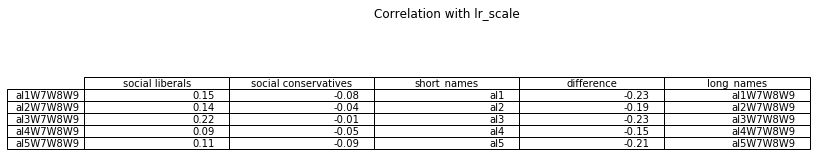

In [245]:
al_vars_early = ['al1W7W8W9',
 'al2W7W8W9',
 'al3W7W8W9',
 'al4W7W8W9',
 'al5W7W8W9']

al_vars_late = ['al1W10W11W12',
 'al2W10W11W12',
 'al3W10W11W12',
 'al4W10W11W12',
 'al5W10W11W12']


side_by_side.loc[al_vars_late]
f = plt.figure(figsize=(13,1))
ax = plt.subplot(111, frame_on=False) # no visible frame
# ax,f = plt.subplots()
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)  # hide the y axis

side_by_side_trimmed = side_by_side
side_by_side[["social liberals","social conservatives", "difference"]] = \
    side_by_side[["social liberals","social conservatives", "difference"]].apply(lambda x: np.floor(x*100)/100)

table(ax, side_by_side.loc[al_vars_early])
plt.title("Correlation with lr_scale")
plt.savefig(BES_output_subfolder + 'table_of_al_corrs_early.png', bbox_inches='tight')

In [233]:
side_by_side[["social liberals","social conservatives", "difference"]].apply(lambda x: np.floor(x*100)/100) 

,social liberals,social conservatives,difference
country,-0.10,-0.03,0.06
ukCitizenW1,-0.05,0.02,0.06
euCitizenW1,-0.02,0.01,0.03
commonwealthCitizenW1,-0.02,0.00,0.01
otherCitizenW1,-0.02,-0.01,0.00
ageW1,-0.10,0.03,0.13
bestOnMIIW1,-0.22,-0.10,0.12
turnoutUKGeneralW1,-0.07,0.09,0.15
turnoutUKGeneralW2,-0.08,0.08,0.15
turnoutUKGeneralW3,-0.06,0.08,0.13


In [344]:
# [x for x in BES_Panel.columns if "profile" in x]

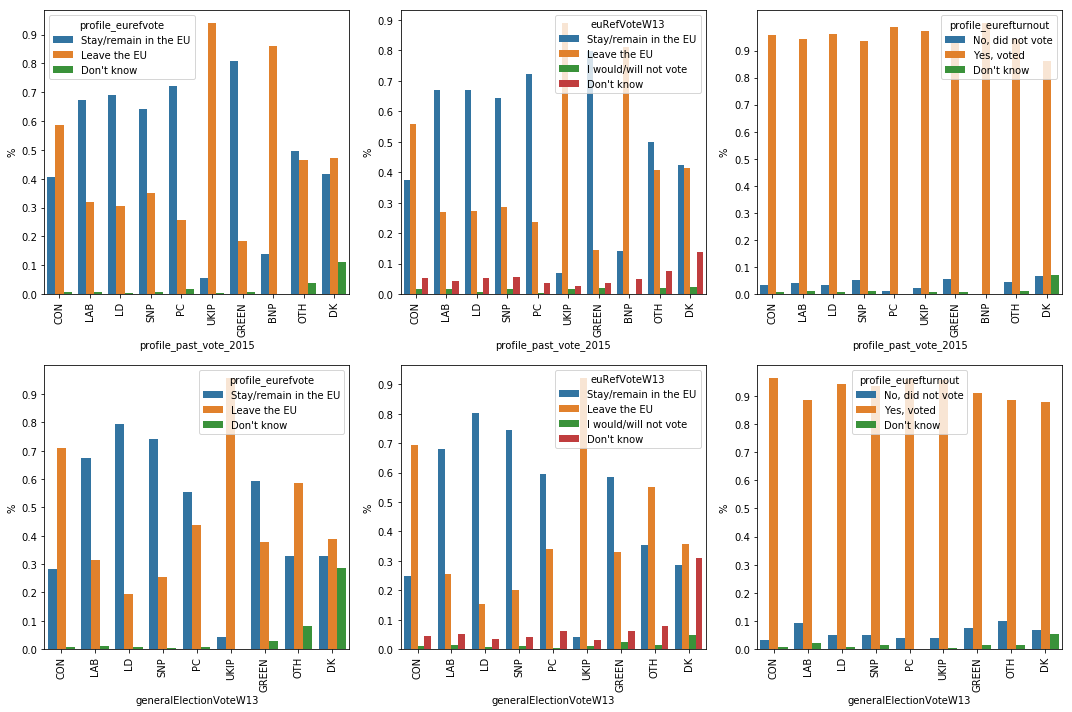

In [298]:
## % of 2017 GE Labour voters voting leave/remain 
# 'wt_new_W13'
# 'profile_past_vote_2015'
# 'generalElectionVoteW13' ('Labour')
# 'profile_eurefvote'

weight_var = 'wt_new_W13'
weights =   BES_Panel[weight_var]

fig, axes = plt.subplots(2, 3, figsize=(15,10))

x = 'profile_past_vote_2015'
y = 'profile_eurefturnout'
    
crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='index',
            values  = weights,
            aggfunc = sum)   

stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
stacked
ax = axes[0,2]
sns.barplot(ax=ax,x=x, y='%', hue=y, data=stacked);
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.set_xticklabels(["CON","LAB","LD","SNP","PC","UKIP","GREEN","BNP","OTH","DK"])
plt.setp(ax.get_xticklabels(), rotation=90);

x = 'generalElectionVoteW13'
y = 'profile_eurefturnout'
    
crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='index',
            values  = weights,
            aggfunc = sum)   

stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
stacked
ax = axes[1,2]
sns.barplot(ax=ax,x=x, y='%', hue=y, data=stacked);
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.set_xticklabels(["CON","LAB","LD","SNP","PC","UKIP","GREEN","OTH","DK"])
plt.setp(ax.get_xticklabels(), rotation=90);


x = 'profile_past_vote_2015'
y = 'profile_eurefvote'
    
crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='index',
            values  = weights,
            aggfunc = sum)   

stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
stacked
ax = axes[0,0]
sns.barplot(ax=ax,x=x, y='%', hue=y, data=stacked);
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.set_xticklabels(["CON","LAB","LD","SNP","PC","UKIP","GREEN","BNP","OTH","DK"])
plt.setp(ax.get_xticklabels(), rotation=90);


x = 'generalElectionVoteW13'
y = 'profile_eurefvote'
    
crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='index',
            values  = weights,
            aggfunc = sum)   

stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
stacked
ax = axes[1,0]
sns.barplot(ax=ax,x=x, y='%', hue=y, data=stacked);
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.set_xticklabels(["CON","LAB","LD","SNP","PC","UKIP","GREEN","OTH","DK"])
plt.setp(ax.get_xticklabels(), rotation=90);


x = 'profile_past_vote_2015'
y = 'euRefVoteW13'
    
crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='index',
            values  = weights,
            aggfunc = sum)   

stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
stacked
ax = axes[0,1]
sns.barplot(ax=ax,x=x, y='%', hue=y, data=stacked);
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.set_xticklabels(["CON","LAB","LD","SNP","PC","UKIP","GREEN","BNP","OTH","DK"])

plt.setp(ax.get_xticklabels(), rotation=90);

x = 'generalElectionVoteW13'
y = 'euRefVoteW13'
    
crosstab = pd.crosstab(BES_Panel[x],
            BES_Panel[y],
            normalize='index',
            values  = weights,
            aggfunc = sum)   

stacked = crosstab.stack().reset_index().rename(columns={0:'%'})
stacked
ax = axes[1,1]
sns.barplot(ax=ax,x=x, y='%', hue=y, data=stacked);
ax.set_yticks(np.arange(0.0, 1.0, 0.1))
ax.set_xticklabels(["CON","LAB","LD","SNP","PC","UKIP","GREEN","OTH","DK"])
plt.setp(ax.get_xticklabels(), rotation=90);

fig.tight_layout()
BES_output_folder = "../BES_analysis_output/"
BES_output_subfolder = BES_output_folder + os.sep + "Remain_Leave_Split_by_party" + os.sep
if not os.path.exists( BES_output_subfolder ):
    os.makedirs( BES_output_subfolder )

plt.savefig(BES_output_subfolder + 'eurefVote(past_current_turnout)_by_party.png')


In [48]:
Labour2017 = BES_Panel['generalElectionVote']=="Labour"
England = BES_Panel["country"]=="England"
Labour2015 = BES_Panel['profile_past_vote_2015']=="Labour"
TurnedOut2015 = ~(BES_Panel['profile_turnout_2015']!="Yes, voted")

Conservative2015 = BES_Panel['profile_past_vote_2015']=="Conservative"
Conservative2017 = BES_Panel['generalElectionVote']=="Conservative"

In [57]:
# England_lab_comeandgo =  ((Labour2017 & ~Labour2015)|(Labour2015 & ~Labour2017))&England 

In [67]:
# (Labour2017 & ~Labour2015).sum() , (Labour2015 & ~Labour2017).sum()
((Labour2017 & ~Labour2015)|(Labour2015 & ~Labour2017))&England

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12        True
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21        True
22       False
23       False
24       False
25       False
26        True
27       False
28        True
29       False
         ...  
31167    False
31168    False
31169    False
31170    False
31171    False
31172    False
31173    False
31174    False
31175    False
31176    False
31177    False
31178    False
31179    False
31180    False
31181    False
31182    False
31183    False
31184    False
31185    False
31186    False
31187    False
31188    False
31189    False
31190    False
31191    False
31192    False
31193    False
31194    False
31195    False
31196    False
Length: 31197, dtype: bool

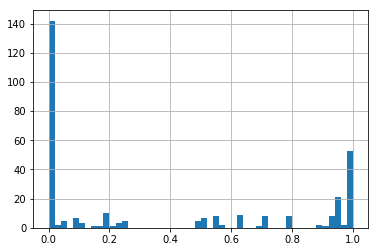

In [96]:
BES_eng_lab_comeandgo = BES_Panel
BES_eng_lab_comeandgo["Labour2015"] = Labour2015
BES_eng_lab_comeandgo["TurnedOut2015"] = TurnedOut2015
BES_eng_lab_comeandgo["LabourInflow2015"] = (Labour2017 & ~Labour2015)
England_lab_comeandgo = ((Labour2017 & ~Labour2015)|(Labour2015 & ~Labour2017))&England

BES_eng_lab_comeandgo = BES_eng_lab_comeandgo[England_lab_comeandgo]

# missing value threshold? 33%
missing_values = BES_eng_lab_comeandgo.isnull().sum()/BES_eng_lab_comeandgo.shape[0]
missing_values.hist(bins=50)

In [97]:
few_missing_values = missing_values[missing_values<.66].index

valid_types = var_type[ var_type["type"].apply(lambda x: (x>=0) and (x!=4)) ].index

valid_variables = [x for x in BES_eng_lab_comeandgo.columns if (x in valid_types) and (x in few_missing_values)]
# valid_variables.append("Labour2015")

In [7]:
BES_eng_lab = BES_Panel
BES_eng_lab["Labour2015"] = Labour2015
BES_eng_lab["TurnedOut2015"] = TurnedOut2015
BES_eng_lab = BES_eng_lab[Labour2017 & England]

# missing value threshold? 33%
missing_values = BES_eng_lab.isnull().sum()/BES_eng_lab.shape[0]
missing_values.hist(bins=50)

In [9]:
few_missing_values = missing_values[missing_values<.66].index

valid_types = var_type[ var_type["type"].apply(lambda x: (x>=0) and (x!=4)) ].index

valid_variables = [x for x in BES_eng_lab.columns if (x in valid_types) and (x in few_missing_values)]
valid_variables.append("Labour2015")

In [12]:
BES_export_to_R = BES_eng_lab[valid_variables].apply(lambda x: x.astype('category'))
BES_export_to_R = BES_export_to_R.apply(lambda x: x.cat.remove_unused_categories())
BES_export_to_R = BES_export_to_R.apply(lambda x: x.cat.codes)
BES_export_to_R = BES_export_to_R.replace(-1,np.nan)

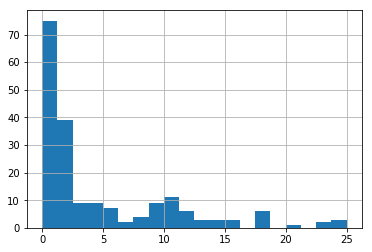

In [13]:
variance = BES_export_to_R.var()
variance[variance<25].hist(bins=20)

In [14]:
BES_export_to_R.drop(variance[variance==0.0].index, axis=1,inplace=True)

In [24]:
filename = dataset_name + "LAB2015_to_LAB2017_switchers"

BES_export_to_R.to_stata(BES_R_data_files + filename + ".dta")
display(filename)

'W13_onlyLAB2015_to_LAB2017_switchers'

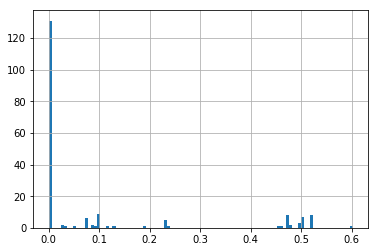

In [25]:
# any 'bad' respondents?
(BES_export_to_R.isnull().sum(axis=0)/BES_export_to_R.shape[0]).hist(bins=100)


In [26]:
## initial one-shot Bayesian Net results
# profile_past_vote_2015 -> Labour2015 -> gor|changeView|partyContactCon

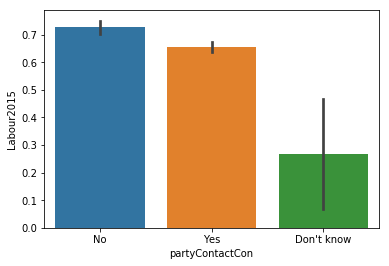

In [27]:
# so ... Cons less likely to contact people who voted Labour in 2015?
sns.barplot(y="Labour2015", x="partyContactCon", data=BES_eng_lab[["Labour2015","partyContactCon"]])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

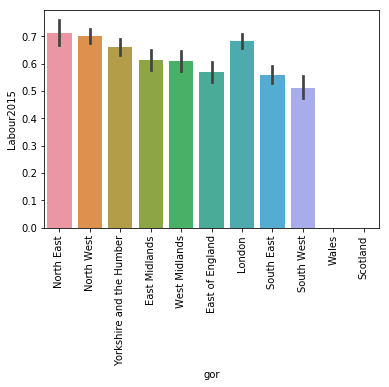

In [28]:
# ?
sns.barplot(y="Labour2015", x="gor", data=BES_eng_lab[["Labour2015","gor"]])
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

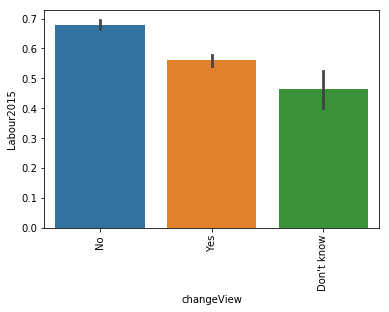

In [29]:
# ?
sns.barplot(y="Labour2015", x="changeView", data=BES_eng_lab[["Labour2015","changeView"]])
plt.xticks(rotation=90)

In [30]:
# ContactEday_2, reasonForVote, pContactEday_2, pContactEday_10, profile_eurefturnout

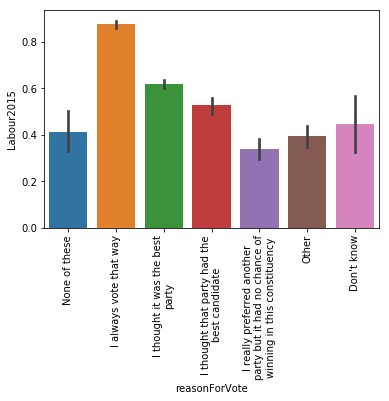

In [31]:
import textwrap
x = "reasonForVote"
y = "Labour2015"
sns.barplot(y=y, x=x, data=BES_eng_lab)
ax = plt.gca();
labels = BES_eng_lab[x].cat.categories
labels=[textwrap.fill(text,30) for text in labels]

plt.xticks(range(0,len(labels)), labels, rotation=90);

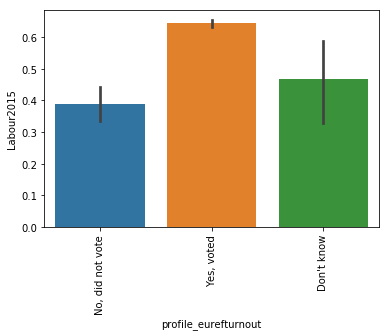

In [32]:
import textwrap
x = "profile_eurefturnout"
y = "Labour2015"
sns.barplot(y=y, x=x, data=BES_eng_lab)
ax = plt.gca();
labels = BES_eng_lab[x].cat.categories
labels=[textwrap.fill(text,30) for text in labels]

plt.xticks(range(0,len(labels)), labels, rotation=90);

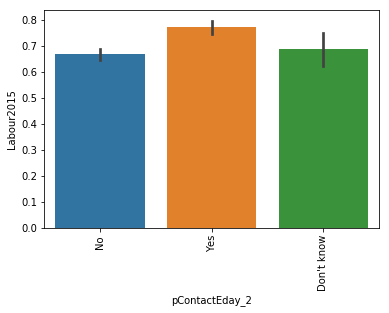

In [33]:


import textwrap
x = "pContactEday_2"
y = "Labour2015"
sns.barplot(y=y, x=x, data=BES_eng_lab)
ax = plt.gca();
labels = BES_eng_lab[x].cat.categories
labels=[textwrap.fill(text,30) for text in labels]

plt.xticks(range(0,len(labels)), labels, rotation=90);

In [23]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
y_var = "TurnedOut2015"

sample_weight = BES_eng_lab["wt_new_W13"]

# var_list = ["ageGroup","profile_eurefturnout","housing","euRefVote","al_scale"]
var_list = valid_variables
invalid_variables = ["Labour2015","profile_turnout_2015","profile_past_vote_2015",
                     "country","generalElectionVote","genElecTurnoutRetro",
                     "age","profile_lea","profile_oslaua","pano",
                     "euRefTurnoutRetro","marital","euRefpastVote",
                     "al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",
                     "edlevel",
                     "voted2015"]


var_list = [ x for x in var_list if x not in invalid_variables ]

In [354]:
# BES_eng_lab[valid_variables].apply(lambda x: len(x.unique())).sort_values()

In [355]:
# BES_logit = BES_eng_lab[[y_var]].apply(lambda x: x.astype('int'))
# BES_logit


In [29]:
BES_logit = BES_eng_lab[[y_var]].apply(lambda x: x.astype('int'))
BES_eng_lab["headHouseholdPast"] = BES_eng_lab["headHouseholdPast"].astype('category') # fix float -> category

for var in var_list:
#     print(var)
    vtype = var_type.loc[ var ]["type"]
    if vtype==3 or var == "euRefVote": # non-ordinal categorical
        sorted_categories = list( BES_eng_lab[var].value_counts().index )
        relative_to = "(" + str(sorted_categories[0])[0:10] + ")"
        dummies = pd.get_dummies( BES_eng_lab[var].cat.remove_unused_categories() , dummy_na = BES_eng_lab[var].isnull().any(), prefix = var + relative_to )
        dummies.drop( var + relative_to + "_" + str(sorted_categories[0]), axis=1, inplace=True )
        BES_logit = pd.concat( [ BES_logit, dummies ] , axis=1)
        
    elif vtype==1: # ordinal categorical
        BES_logit[var] = BES_eng_lab[var]
   
        # if any nans, create var_nan
#         if BES_eng_lab[var].isnull().any():
#             BES_logit[var+"_nan"] = BES_eng_lab[var].isnull().astype('int')

        # if any don't knows, create a don't know
        if BES_eng_lab[var].apply(lambda x: x in Weasel_answers).any():
#             BES_logit[var+"_dk"] = BES_eng_lab[var].apply(lambda x: x in ["Don't know"]).astype('int')
            weasel_cats = [x for x in Weasel_answers if x in BES_logit[var].cat.categories]
            BES_logit[var] = BES_logit[var].cat.remove_categories(weasel_cats)
            
        BES_logit[var] = BES_logit[var].cat.codes
        BES_logit[var] = BES_logit[var].replace(-1,0)
#         BES_logit[var] = BES_logit[var].replace(np.nan,BES_logit[var].dropna().mean())
        
        # should the baseline be 0 or mean?
        # this stuff is going to be normalised
            
          
            
        
        

# BES_logit
# BES_eng_lab[var_list]

x_vars = list(BES_logit.columns)
x_vars.remove(y_var)

X = BES_logit[x_vars]
y = BES_logit[y_var]

# X_normalized = 
X = pd.DataFrame( preprocessing.normalize(X, norm='l2'), columns = X.columns, index = X.index)

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [357]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

vif_df = pd.DataFrame.from_dict( calculate_vif_(X), orient='index' ).sort_values(by=0, ascending=False)
vif_df

,0
partyContact1,49.569603
likeLab,26.351421
pContactEday_10,25.915836
partyContactLab,22.815119
electionInterest,19.658853
satDemUK,18.628209
satDemEng,17.886589
likeCorbyn,17.729245
ptvLab,17.515593
polAttention,16.979337


In [358]:
vif_df[0:50]

,0
partyContact1,49.569603
likeLab,26.351421
pContactEday_10,25.915836
partyContactLab,22.815119
electionInterest,19.658853
satDemUK,18.628209
satDemEng,17.886589
likeCorbyn,17.729245
ptvLab,17.515593
polAttention,16.979337


In [30]:

logreg = LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y, sample_weight=sample_weight)
# logreg.coef_
print(logreg.intercept_)
pd.DataFrame.from_dict({k: v for (k, v) in zip( X.columns , logreg.coef_[0])},orient='index').sort_values(by=0)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [362]:
import statsmodels.api as sm
X_sm = X.copy()
X_sm["intercept"] = 1.0
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit()
print(result.summary())

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [366]:
import statsmodels.api as sm
X_sm = X
# X_sm["intercept"] = 1.0
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit()
print(result.summary())

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\statsmodels\discrete\discrete_model.py:1214: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\statsmodels\discrete\discrete_model.py:1264: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [372]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 50)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

TypeError: __init__() got an unexpected keyword argument 'sample_weight'

In [368]:
X.columns[rfe.support_]

Index(['countryOfBirth(England)_nan', 'bestOnMII(Labour)_nan',
       'reasonForVote(I thought )_I always vote that way', 'voteMethoda',
       'participation_4', 'participation_5', 'polAttention', 'likeFarron',
       'likeSturgeon', 'likeLucas', 'likeLab', 'conUnited', 'ldUnited',
       'grnUnited', 'EUIntegrationUKIP', 'leftRight', 'satDemEng',
       'negotiationSpecifics_2', 'effectsEUTrade', 'effectsEUTerror',
       'effectsEUWorkers', 'euLeaveScotIndep', 'ptvLab', 'ptvUKIP',
       'redistCon', 'redistUKIP', 'natSecuritySelf', 'natSecurityUKIP',
       'natSecurityGrn', 'partyContact1', 'partyContactCon', 'partyContactLab',
       'partyContactLab_2', 'pContactEday_10', 'infoSourceTV',
       'infoSourceRadio', 'policeCuts', 'competentMay', 'competentLucas',
       'anyUni', 'profile_work_stat(Working fu)_Full time student',
       'profile_work_stat(Working fu)_Retired', 'ageGroup',
       'housing(Own the le)_Buying leasehold/freehold on a mortgage',
       'housing(Own the 

In [364]:
# X[X.columns[rfe.support_]]

In [369]:
import statsmodels.api as sm
X_sm = X[X.columns[rfe.support_]]
# X_sm["intercept"] = 1.0
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.227171
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:          TurnedOut2015   No. Observations:                 7002
Model:                          Logit   Df Residuals:                     6952
Method:                           MLE   Df Model:                           49
Date:                Tue, 13 Mar 2018   Pseudo R-squ.:                  0.2094
Time:                        01:48:52   Log-Likelihood:                -1590.7
converged:                       True   LL-Null:                       -2012.0
                                        LLR p-value:                4.042e-145
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# So, as an alternative falsifiable (set of) hypotheses, your pitch is that some mixture of 

# <euRefVote/cutsTooFarNHS/cutsTooFarLocal/auth-lib variables/profile_gross_household income/changeEconomy>

# are the main driver of

# <Labour 2017 GE turnout change/Lab<->Con voteshare swing>?

# euRefVote
# al1,al2,al3,al4,al5,al_scale
# profile_gross_personal
# housing

In [49]:
[x for x in var_list if "hous" in x]

['housing', 'profile_household_children']

In [42]:
var_list = ['profile_gross_personal','housing','al_scale','euRefVote']
# var_list = ['housing']

In [43]:
y_var = "TurnedOut2015"
BES_logit = (~BES_eng_lab[[y_var]]).apply(lambda x: x.astype('int'))
y_var = 'NewTurnout'
BES_logit.columns = [y_var]

BES_eng_lab["headHouseholdPast"] = BES_eng_lab["headHouseholdPast"].astype('category') # fix float -> category

for var in var_list:
#     print(var)
    vtype = var_type.loc[ var ]["type"]
    if vtype==3 or var == "euRefVote": # non-ordinal categorical

        dummies = pd.get_dummies( BES_eng_lab[var].cat.remove_unused_categories(),
                                  dummy_na = BES_eng_lab[var].isnull().any(),
                                  prefix = var ) #  + relative_to
        sorted_categories = dummies.sum().sort_values(ascending=False).index
        # sorted_categories = list( BES_eng_lab[var].value_counts().index )
        # relative_to = "(" + str(sorted_categories[0])[0:10] + ")"
        # 
        dummies.drop( str(sorted_categories[0]), axis=1, inplace=True )
        BES_logit = pd.concat( [ BES_logit, dummies ] , axis=1)
        
    elif vtype==1: # ordinal categorical
        BES_logit[var] = BES_eng_lab[var]
   
        # if any nans, create var_nan
#         if BES_eng_lab[var].isnull().any():
#             BES_logit[var+"_nan"] = BES_eng_lab[var].isnull().astype('int')

        # if any don't knows, create a don't know
        if BES_eng_lab[var].apply(lambda x: x in Weasel_answers).any():
#             BES_logit[var+"_dk"] = BES_eng_lab[var].apply(lambda x: x in ["Don't know"]).astype('int')
            weasel_cats = [x for x in Weasel_answers if x in BES_logit[var].cat.categories]
            BES_logit[var] = BES_logit[var].cat.remove_categories(weasel_cats)
            
        BES_logit[var] = BES_logit[var].cat.codes
        BES_logit[var] = BES_logit[var].replace(-1,0)
#         BES_logit[var] = BES_logit[var].replace(np.nan,BES_logit[var].dropna().mean())
        
        # should the baseline be 0 or mean?
        # this stuff is going to be normalised
            
          
            
        
        

# BES_logit
# BES_eng_lab[var_list]

x_vars = list(BES_logit.columns)
x_vars.remove(y_var)

X = BES_logit[x_vars]
y = BES_logit[y_var]

# X_normalized = 
X = pd.DataFrame( preprocessing.normalize(X, norm='l2'), columns = X.columns, index = X.index)

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

vif_df = pd.DataFrame.from_dict( calculate_vif_(X), orient='index' ).sort_values(by=0, ascending=False)
vif_df

,0
profile_gross_personal,1.380130
al_scale,1.312167
euRefVote_Leave the EU,1.088065
housing_Buying leasehold/freehold on a mortgage,1.075867
housing_Own the leasehold/freehold outright,1.070773
housing_Rented from private landlord,1.029758
housing_Rented from local authority,1.026673
euRefVote_Don't know,1.018312
housing_It belongs to a Housing Association,1.017352
housing_Don't know,1.005272


In [45]:
logreg = LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y, sample_weight=sample_weight)
# logreg.coef_
print(logreg.intercept_)
pd.DataFrame.from_dict({k: v for (k, v) in zip( X.columns , logreg.coef_[0])},orient='index').sort_values(by=0)

[-0.41719042]


,0
housing_Own the leasehold/freehold outright,-9.033124
housing_Buying leasehold/freehold on a mortgage,-7.157246
housing_Rented from local authority,-4.588674
housing_Rented from private landlord,-1.844862
housing_It belongs to a Housing Association,-1.513696
profile_gross_personal,-0.991102
al_scale,-0.810407
housing_Don't know,-0.488645
euRefVote_Leave the EU,0.327947
euRefVote_I would/will not vote,1.134687


In [46]:
import statsmodels.api as sm
X_sm = X.copy()
X_sm["intercept"] = 1.0
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.274051
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             NewTurnout   No. Observations:                 7002
Model:                          Logit   Df Residuals:                     6990
Method:                           MLE   Df Model:                           11
Date:                Sat, 17 Mar 2018   Pseudo R-squ.:                 0.04628
Time:                        02:22:54   Log-Likelihood:                -1918.9
converged:                       True   LL-Null:                       -2012.0
                                        LLR p-value:                 5.282e-34
                                                      coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
profile_gross_personal            

In [47]:
BES_eng_lab["housing"].value_counts()

Own the leasehold/freehold outright        1285
Buying leasehold/freehold on a mortgage    1246
Rented from private landlord                536
Rented from local authority                 313
It belongs to a Housing Association         270
Don't know                                  136
Name: housing, dtype: int64

In [16]:
BES_eng_lab["housing"].shape

(7002,)

In [17]:
BES_eng_lab["housing"].value_counts().sum()

3786

In [34]:
dummies.sum().sort_values(ascending=False).index[0]

'housing(Own the le)_nan'

In [ ]:
# ptvLab, ptvLD, ptvGrn
# partyId
# profile_religion_denom - drop!


In [186]:
# [x for x in BES_eng_lab_comeandgo.columns if "partyId" in x]

['partyId', 'partyIdSqueeze', 'partyIdStrength']

In [188]:
y_var = "LabourInflow2015"

sample_weight = BES_eng_lab_comeandgo["wt_new_W13"]

# var_list = ["ageGroup","profile_eurefturnout","housing","euRefVote","al_scale"]
var_list = valid_variables
invalid_variables = ["Labour2015","profile_turnout_2015","profile_past_vote_2015",
                     "country","generalElectionVote","genElecTurnoutRetro",
                     "age","profile_lea","profile_oslaua","pano",
                     "euRefTurnoutRetro","marital","euRefpastVote",
                     "al1","al2","al3","al4","al5","lr1","lr2","lr3","lr4","lr5",
                     "edlevel",
                     "voted2015",
                     'ptvCon', 'ptvLab', 'ptvLD', 'ptvSNP', 'ptvPC', 'ptvUKIP', 'ptvGrn',
                     'partyId', 'partyIdSqueeze',
                     'profile_religion_denom'
                     ]


var_list = [ x for x in var_list if x not in invalid_variables ]

In [154]:
var_list = ['profile_gross_personal','housing','al_scale','euRefVote','immigSelf','lr_scale']
# var_list = ['reasonForVote']

In [189]:
# y_var = "TurnedOut2015"
# BES_logit = (~BES_eng_lab[[y_var]]).apply(lambda x: x.astype('int'))
# y_var = 'NewTurnout'
# BES_logit.columns = [y_var]
y_var = "LabourInflow2015"
BES_logit = (BES_eng_lab_comeandgo[[y_var]]).apply(lambda x: x.astype('int'))

BES_eng_lab_comeandgo["headHouseholdPast"] = BES_eng_lab_comeandgo["headHouseholdPast"].astype('category') # fix float -> category

for var in var_list:
#     print(var)
    vtype = var_type.loc[ var ]["type"]
    if vtype==3: #or var == "euRefVote": # non-ordinal categorical

        dummies = pd.get_dummies( BES_eng_lab_comeandgo[var].cat.remove_unused_categories(),
                                  dummy_na = BES_eng_lab_comeandgo[var].isnull().any(),
                                  prefix = var ) #  + relative_to
        sorted_categories = dummies.sum().sort_values(ascending=False).index
        print(str(sorted_categories[0]))
        dummies.drop( str(sorted_categories[0]), axis=1, inplace=True )
        if BES_eng_lab_comeandgo[var].isnull().any() and ( str(sorted_categories[0])!=var+"_nan" ):
            dummies.drop( var+"_nan", axis=1, inplace=True )
        
        BES_logit = pd.concat( [ BES_logit, dummies ] , axis=1)
        
    elif vtype==1: # ordinal categorical
        BES_logit[var] = BES_eng_lab_comeandgo[var]
   
        # if any nans, create var_nan
#         if BES_eng_lab[var].isnull().any():
#             BES_logit[var+"_nan"] = BES_eng_lab[var].isnull().astype('int')

        # if any don't knows, create a don't know
        if BES_eng_lab_comeandgo[var].apply(lambda x: x in Weasel_answers).any():
#             BES_logit[var+"_dk"] = BES_eng_lab[var].apply(lambda x: x in ["Don't know"]).astype('int')
            weasel_cats = [x for x in Weasel_answers if x in BES_logit[var].cat.categories]
            BES_logit[var] = BES_logit[var].cat.remove_categories(weasel_cats)
            
        BES_logit[var] = BES_logit[var].cat.codes
        BES_logit[var] = BES_logit[var].replace(-1,0)
#         BES_logit[var] = BES_logit[var].replace(np.nan,BES_logit[var].dropna().mean())
        
        # should the baseline be 0 or mean?
        # this stuff is going to be normalised
            
          
            
        
        

# BES_logit
# BES_eng_lab[var_list]

x_vars = list(BES_logit.columns)
x_vars.remove(y_var)

X = BES_logit[x_vars]
y = BES_logit[y_var]

# X_normalized = 
X = pd.DataFrame( preprocessing.normalize(X, norm='l2'), columns = X.columns, index = X.index)

C:\Users\Marios\AppData\Local\conda\conda\envs\BES_analysis\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


countryOfBirth_nan
bestOnMII_Labour
reasonForVote_I thought it was the best party
registered_Yes - at $postcode_hidden
profile_work_stat_Working full time (30 or more hours per week)
housing_nan
gor_South East
education_University or CNAA first degree (eg BA, B.Sc, B.Ed)
profile_ethnicity_White British
profile_marital_stat_Married
profile_newspaper_None
profile_religion_No, I do not regard myself as belonging to any particular religion.
headHouseholdPast_1.0


In [190]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
def calculate_vif_(X):
    variables = list(X.columns)
    vif = {variable:variance_inflation_factor(exog=X.values, exog_idx=ix) for ix,variable in enumerate(list(X.columns))}
    return vif

vif_df = pd.DataFrame.from_dict( calculate_vif_(X), orient='index' ).sort_values(by=0, ascending=False)
vif_df

,0
partyContact1,29.369573
satDemUK,17.964294
partyContactLab,17.911517
satDemEng,16.830879
ageGroup,15.995141
electionInterest,15.719066
pContactEday_10,15.479839
polAttention,14.975469
likeLab,12.320558
immigEcon,12.076081


In [191]:
logreg = LogisticRegression(C=1e5)
# we create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, y, sample_weight=sample_weight)
print(logreg.intercept_)
pd.DataFrame.from_dict({k: v for (k, v) in zip( X.columns , logreg.coef_[0])},orient='index').sort_values(by=0)

[-0.5591971]


,0
bestOnMII_Scottish National Party (SNP),-206.709412
countryOfBirth_Other: Rest of world,-62.623365
partyContact1,-56.196899
bestOnMII_Conservative,-51.478099
bestOnMII_Liberal Democrat,-49.037503
regretsIHaveAFew,-47.523921
housing_It belongs to a Housing Association,-47.388474
"profile_religion_Yes - Evangelical  independent/non-denominational (e.g. FIEC, Pioneer, Vineyard, Newfrontiers)",-45.389418
profile_ethnicity_White and Black Caribbean,-44.517898
education_Scottish Ordinary/ Lower Certificate,-44.271376


In [192]:
import statsmodels.api as sm
X_sm = X.copy()
X_sm["intercept"] = 1.0
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.366021
         Iterations: 35


LinAlgError: Singular matrix

In [212]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select = 60)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

[False False False False False False False False False False False  True
  True False False False False False  True False  True False False False
  True  True False False False False False False False  True  True  True
  True  True False False  True  True False False  True  True  True  True
 False False False  True  True False  True  True False  True  True  True
 False False  True False  True  True False  True False  True False False
 False False False False False False  True  True  True False False  True
  True False False False False False  True False  True False False False
 False False False  True  True  True False False False False False  True
 False False  True  True  True False False  True  True False False False
 False False False False False False False False False False False False
 False False  True False  True False False False False False False  True
  True  True  True False False False  True  True False  True False False
 False False False False False False  True False Fa

In [213]:
X.columns[rfe.support_]

Index(['bestOnMII_Conservative', 'bestOnMII_Liberal Democrat',
       'regretsIHaveAFew', 'reasonForVote_I always vote that way',
       'reasonForVote_Don't know', 'voteMethoda', 'expectGoodConductGeneral',
       'polAttention', 'pidWeThey', 'pidInterestedOthers', 'pidCriticiseParty',
       'pidConnected', 'pidMyParty', 'likeMay', 'likeCorbyn', 'likeFarron',
       'likeSturgeon', 'likeLab', 'likeLD', 'likeUKIP', 'likeGrn', 'labUnited',
       'ldUnited', 'ukipUnited', 'econGenRetro', 'EUIntegrationCon',
       'EUIntegrationLab', 'EUIntegrationUKIP', 'leftRight',
       'handleEUNegotiate', 'euPriorityBalance', 'effectsEUUnemployment',
       'effectsEUTerror', 'euLeaveVoice', 'euLeaveScotIndep', 'asylumMore',
       'prefTradeoff', 'beliefTradeoff', 'redistSelf', 'natSecuritySelf',
       'natSecurityLD', 'natSecurityUKIP', 'natSecurityGrn', 'partyContactLab',
       'partyContactLD', 'infoSourceRadio', 'infoSourcePeople', 'integrityMay',
       'integrityCorbyn', 'competentMay', 

In [214]:
import statsmodels.api as sm
X_sm = X[X.columns[rfe.support_]].copy()
X_sm["intercept"] = 1.0
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit(maxiter=100)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.403356
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       LabourInflow2015   No. Observations:                 3691
Model:                          Logit   Df Residuals:                     3630
Method:                           MLE   Df Model:                           60
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3374
Time:                        01:57:33   Log-Likelihood:                -1488.8
converged:                       True   LL-Null:                       -2246.8
                                        LLR p-value:                2.480e-277
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
bestOnMII_

In [ ]:
# infoSourceRadio !!!!!

In [144]:
BES_Panel["regretsIHaveAFew"].value_counts()

No            26463
Yes            1290
Don't know      559
Name: regretsIHaveAFew, dtype: int64

In [147]:
BES_Panel["voteMethoda"].cat.categories

Index(['In person', 'I visited the polling station on my own',
       'I visited the polling station with someone else',
       'Someone else voted for me (proxy voting)', 'Don't know'],
      dtype='object')

In [153]:
BES_Panel["reasonForVote"].value_counts()
# BES_Panel["reasonForVote"].isnull().sum()

I thought it was the best party                                                          13799
I always vote that way                                                                    5008
I thought that party had the best candidate                                               3406
Other                                                                                     2800
I really preferred another party but it had no chance of winning in this constituency     2360
None of these                                                                              683
Don't know                                                                                 256
Name: reasonForVote, dtype: int64

In [215]:
result.pvalues[result.pvalues<.05].index

Index(['bestOnMII_Conservative', 'bestOnMII_Liberal Democrat',
       'regretsIHaveAFew', 'reasonForVote_I always vote that way',
       'reasonForVote_Don't know', 'voteMethoda', 'likeMay', 'likeCorbyn',
       'likeFarron', 'EUIntegrationCon', 'EUIntegrationLab', 'leftRight',
       'asylumMore', 'redistSelf', 'partyContactLab', 'partyContactLD',
       'infoSourceRadio', 'likeBoris', 'changeView', 'ageGroup',
       'profile_newspaper_The Mirror / Daily Record',
       'profile_religion_Yes - Church of England/Anglican/Episcopal',
       'al_scale'],
      dtype='object')

In [216]:
import statsmodels.api as sm
sig_p_value_list = list( result.pvalues[result.pvalues<.1].index)
sig_p_value_list = [x for x in sig_p_value_list if x not in ["intercept"]]
# ,"bestOnMII_Conservative","regretsIHaveAFew",
#                                                              "reasonForVote_I always vote that way","profile_newspaper_The Mirror / Daily Record",
#                                                              "partyContactLD","voteMethoda"] ]
X_sm = X[sig_p_value_list].copy()
X_sm["intercept"] = 1.0
logit_model=sm.Logit(y,X_sm)
result=logit_model.fit(maxiter=100)
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.410726
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:       LabourInflow2015   No. Observations:                 3691
Model:                          Logit   Df Residuals:                     3661
Method:                           MLE   Df Model:                           29
Date:                Sun, 18 Mar 2018   Pseudo R-squ.:                  0.3253
Time:                        01:57:33   Log-Likelihood:                -1516.0
converged:                       True   LL-Null:                       -2246.8
                                        LLR p-value:                8.609e-290
                                                                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
bestOnMII_

In [ ]:
# ptvLab, ptvLD, ptvGrn
# partyId
# profile_religion_denom - drop!


In [209]:
corr = X_sm.corr()
corr[corr>.1]

,likeMay,likeFarron,likeUKIP,labUnited,ldUnited,ukipUnited,EUIntegrationCon,asylumMore,prefTradeoff,redistSelf,infoSourceRadio,changeView,profile_marital_stat_Never married,profile_religion_Yes - Church of England/Anglican/Episcopal,al_scale,intercept
likeMay,1.000000,NaN,0.265314,NaN,NaN,0.111475,NaN,NaN,NaN,0.195802,NaN,NaN,NaN,0.169651,0.141279,NaN
likeFarron,NaN,1.000000,NaN,0.101534,0.382678,NaN,0.171822,0.218850,NaN,NaN,0.133019,NaN,NaN,NaN,NaN,NaN
likeUKIP,0.265314,NaN,1.000000,NaN,NaN,0.256189,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.139316,0.249672,NaN
labUnited,NaN,0.101534,NaN,1.000000,0.358097,0.196022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ldUnited,NaN,0.382678,NaN,0.358097,1.000000,0.343668,0.224186,0.150066,NaN,NaN,0.101157,0.125231,NaN,NaN,NaN,NaN
ukipUnited,0.111475,NaN,0.256189,0.196022,0.343668,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EUIntegrationCon,NaN,0.171822,NaN,NaN,0.224186,NaN,1.000000,0.216950,NaN,NaN,NaN,0.119055,NaN,NaN,NaN,NaN
asylumMore,NaN,0.218850,NaN,NaN,0.150066,NaN,0.216950,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prefTradeoff,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.116902,NaN
redistSelf,0.195802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
## Does *not voting* in the eu referendum have an *independent effect* on Remain/Leave?

## profile_eurefturnout, euRefTurnout


## current stance?
# euRefVoteW13
# "If there was a referendum on Britain’s membership of the European Union$turnoutText, how do you think you would vote?"

# euRefFinal
# [If the UK votes to leave the EU, do you think the decision will be final or might there be a second referendum?

# profile_eurefvote
# Which way did you vote?

# happyEULeave
# How happy or how disappointed are you that the UK voted to leave the EU?

# regrets?


In [ ]:
## How do we want to go about answering this?
# could look at logistic regression
# could go on a hunt for generic factors
   # age, al_scale, immigSelf, EUIntegrationSelf
   # sentiments taken at time of referendum
   # attitude to referendum taken now!

# Age


In [138]:
[x for x in BES_Panel.columns if "regret" in x.lower()]

['regretsIHaveAFewW6',
 'regretsIHaveAFewEUW9',
 'regretsIHaveAFewEUW10',
 'regretsIHaveAFewEUW11',
 'regretsIHaveAFewW13']

In [12]:
BES_Panel['profile_eurefturnout'].value_counts()

Yes, voted          45188
No, did not vote     4183
Don't know            784
Name: profile_eurefturnout, dtype: int64

In [139]:
BES_Panel[[x for x in BES_Panel.columns if "regret" in x]].notnull().sum()

regretsIHaveAFewW6       27821
regretsIHaveAFewEUW9     28248
regretsIHaveAFewEUW10    30319
regretsIHaveAFewEUW11    31014
regretsIHaveAFewW13      28312
dtype: int64

In [24]:
BES_Panel[[x for x in BES_Panel.columns if "immigSelf" in x]].notnull().sum()

immigSelfW7     30895
immigSelfW8     33502
immigSelfW9     30036
immigSelfW10    30319
immigSelfW11    31014
immigSelfW12     9008
immigSelfW13     1292
dtype: int64

In [140]:
BES_Panel[[x for x in BES_Panel.columns if "eurefdoover" in x.lower()]].notnull().sum()

euRefDoOverW10    30319
euRefDoOverW11    31014
euRefDoOverW13    31197
dtype: int64

In [ ]:
# EUIntegrationSelfW7, immigSelfW7, al_scaleW7W8W9, Age
# 'EUIntegrationSelfW7__Protect our independence', 'immigSelfW7__Allow many more', 'al_scaleW7W8W9__Authoritarian', 'Age'
# profile_eurefturnout
# 'profile_eurefturnout_Yes'

# happyEULeaveW11
# 'happyEULeaveW11__Extremely happy'

In [141]:
[x for x in BES_reduced.columns if "eurefdoover" in x]

[]

In [58]:
BES_reduced_with_na['happyEULeaveW11__Extremely happy'].value_counts()

10.0    8841
0.0     8390
8.0     1960
2.0     1859
5.0     1749
1.0     1701
9.0     1544
3.0     1424
7.0     1231
6.0      787
4.0      774
Name: happyEULeaveW11__Extremely happy, dtype: int64

In [56]:
complete_values = BES_reduced_with_na[['EUIntegrationSelfW7__Protect our independence', 'immigSelfW7__Allow many more', 'al_scaleW7W8W9__Authoritarian', 'Age',
                                       'profile_eurefturnout_Yes','happyEULeaveW11__Extremely happy']].notnull().all(axis=1)

In [59]:
filled_in_DV = BES_reduced_with_na['happyEULeaveW11__Extremely happy'].notnull()

In [110]:
# X = BES_reduced_with_na[filled_in_DV][['EUIntegrationSelfW7__Protect our independence', 'immigSelfW7__Allow many more', 'al_scaleW7W8W9__Authoritarian', 'Age',
#                                        'profile_eurefturnout_Yes']]
# y = BES_reduced_with_na[filled_in_DV][['happyEULeaveW11__Extremely happy']]

X_vars = ['EUIntegrationSelfW7__Protect our independence', 'immigSelfW7__Allow many more', 'al_scaleW7W8W9__Authoritarian', 'Age',
                                       'profile_eurefturnout_Yes']
y_var = ['happyEULeaveW11__Extremely happy']
y_var = 

X_and_y = BES_reduced_with_na[filled_in_DV][X_vars + y_var]
X_and_y_filled = X_and_y.fillna(X_and_y.mean())

In [88]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm

In [131]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(copy=True, with_mean=True, with_std=True)
X_and_y_filled_scaled = pd.DataFrame( scaler.fit_transform(X_and_y_filled), columns = X_and_y_filled.columns, index = X_and_y_filled.index)


In [135]:
X = X_and_y_filled_scaled[X_vars]
y = X_and_y_filled_scaled[y_var]




In [136]:
X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                                   OLS Regression Results                                   
Dep. Variable:     happyEULeaveW11__Extremely happy   R-squared:                       0.367
Model:                                          OLS   Adj. R-squared:                  0.367
Method:                               Least Squares   F-statistic:                     3506.
Date:                              Tue, 20 Mar 2018   Prob (F-statistic):               0.00
Time:                                      16:13:11   Log-Likelihood:                -36022.
No. Observations:                             30260   AIC:                         7.206e+04
Df Residuals:                                 30254   BIC:                         7.211e+04
Df Model:                                         5                                         
Covariance Type:                          nonrobust                                         
                                                    coef    std err   

In [128]:
X
